# <p style="text-align: center;"> Airbnb Price Prediction (Project for MATH 80629)</p>

## <p style="text-align: center;"> Amirhossein Hajigholam Saryazdi, Fatemeh Zand</p>



[Introduction]

# Preprocessing

In [1]:
# Importing packages
import pandas as pd
import numpy as np
np.random.seed(12345)
import seaborn as sns
import matplotlib.pylab as plt
from sklearn.impute import KNNImputer

from sklearn.preprocessing import StandardScaler, binarize

%matplotlib inline

# Change pandas viewing options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [3]:
# Importing Data
#source of data: http://insideairbnb.com/get-the-data.html
data=pd.read_csv(r"C:\Users\utob\Desktop\ML\toronto 08 augest\listings-Toronto.csv",encoding='latin1')

data.head(1)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,zipcode,market,smart_location,country_code,country,latitude,longitude,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1419,https://www.airbnb.com/rooms/1419,20190808195523,43685,Beautiful home in amazing area!,"This large, family home is located in one of T...",Visit Toronto with this fabulous furnished hom...,"This large, family home is located in one of T...",none,The apartment is located in the Ossington stri...,"To learn a little more about our home, see: (U...",All forms of public transportation are easily ...,The whole house and garden are available.,"We will be out of town, but fully accessible b...",This is our much-loved family home. We expect ...,NaN,NaN,https://a0.muscache.com/im/pictures/76206750/d...,NaN,1565,https://www.airbnb.com/users/show/1565,Alexandra,39668.0,"Toronto, Ontario, Canada","I live in Toronto, Canada with my husband and ...",NaN,NaN,NaN,f,https://a0.muscache.com/im/users/1565/profile_...,https://a0.muscache.com/im/users/1565/profile_...,Commercial Drive,1.0,1.0,"['email', 'phone', 'reviews', 'jumio', 'govern...",t,t,"Toronto, ON, Canada",Little Portugal,Little Portugal,NaN,Toronto,ON,M6J,Toronto,"Toronto, Canada",CA,Canada,43.64617,-79.42451,f,House,Entire home/apt,10,3.0,5.0,7.0,Real Bed,"{TV,Internet,Wifi,""Air conditioning"",Kitchen,""...",1400.0,470,2000.0,NaN,1000.0,150.0,1,0,4,730,4,4,730,730,4.0,730.0,18 months ago,t,0,0,0,0,43685,7,0,42204.0,43073.0,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,NaN,f,f,strict_14_with_grace_period,f,f,1,1,0,0,0.14


In [4]:
print(data.shape)

#print(len(data.columns))

print(data.duplicated().sum())
# No duplicated value

(21617, 106)
0


This data has 106 columns. We must explore them and select useful featurs.

In [5]:
# Looking at featurs and their type
data.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                      int64
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules                                      object
thumbnail_url                                   float64
medium_url                                      float64
picture_url                                     

### Initial column selection

As a baseline, we can start by removing features that we intuitively sense will not be of great importance to a listing's price. These can be further explored later, if need be. In the following you can find reason of removing for some variable as instances. Most of them are not related to the study or have a better subtitute in featuers.

- listing_url, thumbnail_url, medium_url	
- scrape_id: Not related to actual property data.
- Text features(name,summary,space,description,neighborhood_overview, notes, transit, access, interaction,	house_rules, host_about): Could perform text analysis and mentioned in 'Further Exploration' in the overview. We, however, will not do that.
- experiences_offered
- last_scraped: All within first three days of January, not related to actual property data.
- picture_url, xl_picture_url: Could perform visual analysis and mentioned in 'Further Exploration' in the overview. We, however, will not do that.
- host_id: Ties a host to the property; high unique count makes it unattractive to use.
- host_name,host_location,host_neighbourhood: Not related to actual property data; no textual importance.
- host_since: Not specific to the listing - arguable how it can be a beneficial feature; no textual importance.
- host_picture_url,host_thumbnail_url: Irrelevant to property data; could perform visual analysis.
- host_listings_count: host_total_listings_count is available.
- host_has_profile_pic, host_has_profile_pic: host_identity_verified is presented instead.


- street: Generic names; location data captured with lower unique count in other geographical features.
- neighbourhood,latitude,longtitude : The zipcode feature presents the same data in a better format.
- state: All listings are in the state of Ontario - this is useless.
- market: All listings should be in the Toronto market - this is useless.
- country: All listings are in the Canada - this is useless.


- weekly_price: Function of daily price - should not be a predictor.
- monthly_price: Function of daily price - should not be a predictor.
- calendar_updated: Does not say much about the property data.
- calendar_last_scraped: All within first three days of January, irrelevant to actual property data.
- first_review: Time irrelevant to property data, high unique count.
- last_review: Time irrelevant to property data, high unique count.


- beds, bedrooms : keeping accommodates instead


In [6]:
data0=data.drop(['listing_url', 'scrape_id', 'last_scraped','name','summary','space', 'description','experiences_offered',
       'neighborhood_overview','notes', 'transit', 'access', 'interaction', 'house_rules','thumbnail_url', 'medium_url',
                 'picture_url', 'host_url','xl_picture_url', 'host_id', 'host_name', 'host_since','host_location',
                 'host_about', 'host_thumbnail_url', 'host_picture_url','host_neighbourhood','host_listings_count',
                 'host_verifications', 'host_has_profile_pic', 'street','neighbourhood','neighbourhood_cleansed',
                 'neighbourhood_group_cleansed','city','state','market','smart_location' ,'country_code', 'country', 'is_location_exact', 'amenities',
                 'monthly_price', 'maximum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
                 'minimum_maximum_nights', 'maximum_maximum_nights','minimum_nights_avg_ntm','maximum_nights_avg_ntm',
                 'calendar_updated', 'has_availability', 'availability_30', 'availability_60', 'availability_90',
                 'calendar_last_scraped', 'calendar_last_scraped', 'number_of_reviews_ltm', 'first_review', 'last_review',
                 'requires_license', 'license', 'jurisdiction_names', 'is_business_travel_ready', 'require_guest_profile_picture',
                 'require_guest_phone_verification', 'calculated_host_listings_count','calculated_host_listings_count_entire_homes',
                 'calculated_host_listings_count_private_rooms', 'calculated_host_listings_count_shared_rooms',
                 'calculated_host_listings_count_shared_rooms','latitude','longitude','reviews_per_month','review_scores_accuracy',
                 'review_scores_cleanliness','review_scores_checkin','review_scores_communication','review_scores_location','review_scores_value',
                 'bedrooms','beds'], axis=1)

### Data Cleaning

In [7]:
# removing $
data0['price'] = data0['price'].str.replace('$','').str.replace(',', '').astype(float)

data0['security_deposit'] = data0['security_deposit'].str.replace('$','').str.replace(',', '').astype(float)
data0['cleaning_fee'] = data0['cleaning_fee'].str.replace('$','').str.replace(',','').astype(float)
data0['extra_people'] = data0['extra_people'].str.replace('$','').str.replace(',','').astype(float)

AttributeError: Can only use .str accessor with string values!

In [8]:
data0.head()

,id,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bed_type,square_feet,price,weekly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,1419,NaN,NaN,NaN,f,1.0,t,M6J,House,Entire home/apt,10,3.0,Real Bed,1400.0,470,2000.0,1000.0,150.0,1,0,4,0,7,100.0,f,strict_14_with_grace_period
1,8077,NaN,NaN,NaN,f,2.0,f,M5J,Apartment,Private room,2,1.5,Real Bed,NaN,100,NaN,2654.0,NaN,1,0,180,0,169,97.0,t,strict_14_with_grace_period
2,12604,NaN,NaN,NaN,f,1.0,t,M6G,House,Private room,1,1.5,Pull-out Sofa,120.0,67,394.0,133.0,27.0,1,20,1,0,0,NaN,f,moderate
3,23691,within an hour,1.00,NaN,t,2.0,t,M6E 2P3,House,Private room,3,1.0,Real Bed,NaN,72,NaN,0.0,0.0,2,20,1,244,209,95.0,t,strict_14_with_grace_period
4,26654,within a day,0.69,NaN,f,7.0,t,M5V 3P5,Condominium,Entire home/apt,5,1.0,Real Bed,NaN,199,NaN,300.0,51.0,2,18,4,357,37,95.0,f,strict_14_with_grace_period


In [9]:
data0.isna().sum()

id                               0
host_response_time            4788
host_response_rate            4788
host_acceptance_rate         21617
host_is_superhost                5
host_total_listings_count        5
host_identity_verified           5
zipcode                        359
property_type                    0
room_type                        0
accommodates                     0
bathrooms                       11
bed_type                         0
square_feet                  21465
price                            0
weekly_price                 19598
security_deposit              5035
cleaning_fee                  3406
guests_included                  0
extra_people                     0
minimum_nights                   0
availability_365                 0
number_of_reviews                0
review_scores_rating          4064
instant_bookable                 0
cancellation_policy              0
dtype: int64

We are going to remove 'host_acceptance_rate', 'host_response_time', 'host_response_rate', 'square_feet','weekly_price' features  because of their high amount of missing values. This will not affect the model since there are other features for evaluating the same consepts.

In [10]:
data1 = data0.drop(['host_acceptance_rate', 'host_response_rate', 'host_response_time', 'square_feet', 'weekly_price'], axis=1)

We also drop any entries that are missing (NaN) values (except for missings greater than 1000).


In [11]:
data1=data1.dropna(subset=['zipcode', 'bathrooms', 'host_is_superhost','host_total_listings_count','host_identity_verified'])

In [12]:
data1.isna().sum()

id                              0
host_is_superhost               0
host_total_listings_count       0
host_identity_verified          0
zipcode                         0
property_type                   0
room_type                       0
accommodates                    0
bathrooms                       0
bed_type                        0
price                           0
security_deposit             4945
cleaning_fee                 3340
guests_included                 0
extra_people                    0
minimum_nights                  0
availability_365                0
number_of_reviews               0
review_scores_rating         3971
instant_bookable                0
cancellation_policy             0
dtype: int64

There are plenty of Nan's in 'security_deposit' and 'security_deposit'. It's more than likely that these hosts do not charge any extra cleaning fee. So let's simply replace these null values with 0.00:

In [13]:
data1.cleaning_fee.fillna(0, inplace=True)
data1.cleaning_fee.isna().sum()

0

In [14]:
data1.security_deposit.fillna(0, inplace=True)
data1.security_deposit.isna().sum()

0

In [15]:
# a code for seeing different values of a variable
data1.number_of_reviews.value_counts()

0      3705
1      1856
2      1264
3       994
4       782
5       676
6       609
7       535
8       479
10      424
9       407
11      375
12      346
14      312
13      297
16      264
15      257
18      236
19      222
17      206
20      205
22      190
21      182
23      176
24      165
25      161
29      155
28      152
27      145
30      135
26      128
32      119
33      118
34      117
31      109
36      108
35      103
39      103
38       95
42       94
45       88
37       87
40       87
43       82
41       78
56       75
47       74
44       70
54       70
46       69
48       66
52       65
57       63
58       63
49       61
53       59
61       58
50       58
51       56
64       56
55       56
68       54
59       51
78       51
76       47
62       46
70       46
65       45
73       44
60       43
66       43
67       41
63       40
74       39
82       39
69       37
72       37
81       37
75       37
71       37
105      36
77       35
80       34
86  

There are 3968 missing values in 'review_scores_rating' and there are 3702 listings with 0 reviews. It seems that the data put NaN for 'review_scores_rating' when there is 0 review for a listing.  We replace any NaN values that have no review with 'No Reviews'.

In [16]:
data2=data1.copy()

In [17]:
#substituting zero just for being able to plot the data
idx = data2['review_scores_rating'][data2['number_of_reviews'] == 0].index.values.tolist()

for i in idx:
    data2.review_scores_rating[i]="No Reviews"

<ipython-input-17-730023db1f64>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data2.review_scores_rating[i]="No Reviews"
C:\Users\utob\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [18]:
# drop the remaining few NAN in review

data2=data2.dropna(subset=['review_scores_rating'])

In [19]:
# convert review_scores_rating into buckets
def convert_scores_buckets(val):
    if val == 'No Reviews':
        return 'No Reviews'
    elif val >= 95.0:
        return '95-100'
    elif val >= 90.0 and val < 95.0:
        return '90-94'
    elif val >= 85.0 and val < 90.0:
        return '85-89'
    elif val >= 80.0 and val < 85.0:
        return '80-84'
    elif val >= 70.0 and val < 80.0:
        return '70-79'
    elif val >= 60.0 and val < 70.0:
        return '60-69'
    elif val >= 50.0 and val < 60.0:
        return '50-59'
    elif val >= 40.0 and val < 50.0:
        return '40-49'
    elif val >= 30.0 and val < 40.0:
        return '30-39'
    elif val >= 20.0 and val < 30.0:
        return '20-29'
    elif val >= 10.0 and val < 20.0:
        return '10-19'
    elif val < 10.0:
        return '0-9'

data2['review_scores_rating'] = data2['review_scores_rating'].apply(convert_scores_buckets)


In [20]:
data2.review_scores_rating.value_counts()

95-100        11226
No Reviews     3705
90-94          3439
85-89          1184
80-84           858
70-79           251
60-69           215
20-29            52
50-59            23
40-49            22
30-39             1
Name: review_scores_rating, dtype: int64

In [20]:
data2.isna().sum()

id                           0
host_is_superhost            0
host_total_listings_count    0
host_identity_verified       0
zipcode                      0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bed_type                     0
price                        0
security_deposit             0
cleaning_fee                 0
guests_included              0
extra_people                 0
minimum_nights               0
availability_365             0
number_of_reviews            0
review_scores_rating         0
instant_bookable             0
cancellation_policy          0
dtype: int64

We will only keep first three letters of zipcodes. The reason is that we will treat this variable as a categorical one and with only ~21K users and >7K unique zip codes, it is unlikely that we can learn precise enough coefficients for this feature.

In [21]:
# convert ZipCode

print(f'We originally have {data2.zipcode.nunique()} different zip codes')

data2['zipcode'] = data2['zipcode'].apply(lambda x: x[:3])

print(f'By only keep the first three digits of each zip code, \
we reduced the unique number of zip codes to {data2.zipcode.nunique()}.')

We originally have 7028 different zip codes
By only keep the first three digits of each zip code, we reduced the unique number of zip codes to 161.


In [22]:
data2.head()

,id,host_is_superhost,host_total_listings_count,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,1419,f,1.0,t,M6J,House,Entire home/apt,10,3.0,Real Bed,470,1000.0,150.0,1,0,4,0,7,95-100,f,strict_14_with_grace_period
1,8077,f,2.0,f,M5J,Apartment,Private room,2,1.5,Real Bed,100,2654.0,0.0,1,0,180,0,169,95-100,t,strict_14_with_grace_period
2,12604,f,1.0,t,M6G,House,Private room,1,1.5,Pull-out Sofa,67,133.0,27.0,1,20,1,0,0,No Reviews,f,moderate
3,23691,t,2.0,t,M6E,House,Private room,3,1.0,Real Bed,72,0.0,0.0,2,20,1,244,209,95-100,t,strict_14_with_grace_period
4,26654,f,7.0,t,M5V,Condominium,Entire home/apt,5,1.0,Real Bed,199,300.0,51.0,2,18,4,357,37,95-100,f,strict_14_with_grace_period


In [23]:
#data2.beds.value_counts()

In [24]:
data2['accommodates'].describe()

count    20976.000000
mean         3.194031
std          2.070881
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         16.000000
Name: accommodates, dtype: float64

# @ FATEMEH

* 'beds' and 'bedrooms' are dropped at the very beginning.


* drop 'number of reviews' after drawing a graph of it vs price. (Explanation like Babak)


* clean price from 0 and unreasonably high values (like mentioned notebook https://www.kaggle.com/brittabettendorf/predicting-prices-xgboost-feature-engineering)


* A way for preproceeesing amenities. https://www.kaggle.com/kaushikjag/airbnb-seattle-new-host-pricing-tip-prediction


* you can add number of amenities (like mentioned notebook)
https://www.kaggle.com/mhmdpkts/predict-price-ann-data-cleaning-future-engineering
cell 31 of this notebook proposed Z-score for outliers.


* Any approach you get for outliers, be careful not to lose much data at the end.

In [23]:
data3=data2.copy()

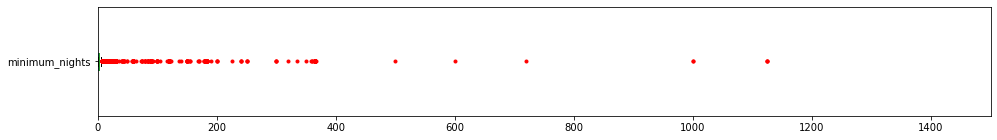

In [26]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['minimum_nights'].plot(kind='box', xlim=(0, 1500), vert=False, flierprops=red_square, figsize=(16,2));

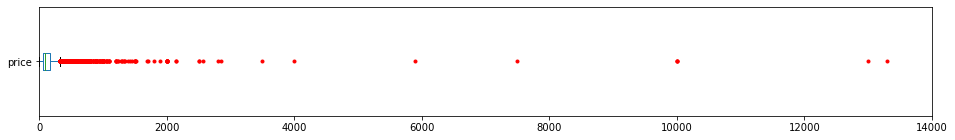

In [27]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['price'].plot(kind='box', xlim=(0, 14000), vert=False, flierprops=red_square, figsize=(16,2));

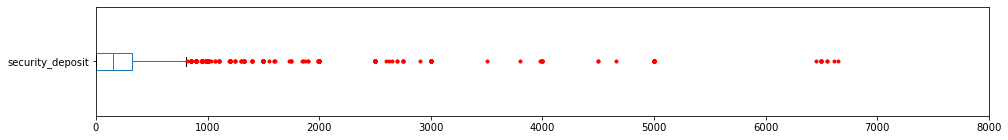

In [28]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['security_deposit'].plot(kind='box', xlim=(0, 8000), vert=False, flierprops=red_square, figsize=(16,2));

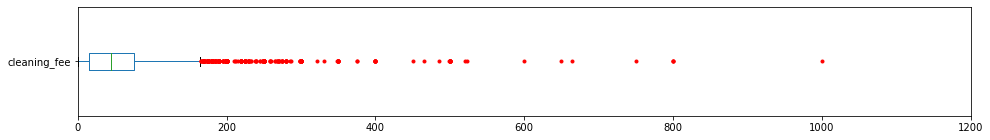

In [29]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['cleaning_fee'].plot(kind='box', xlim=(0, 1200), vert=False, flierprops=red_square, figsize=(16,2));

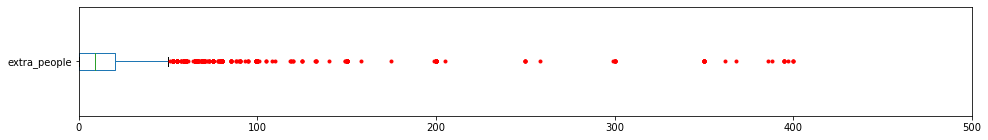

In [30]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['extra_people'].plot(kind='box', xlim=(0, 500), vert=False, flierprops=red_square, figsize=(16,2));

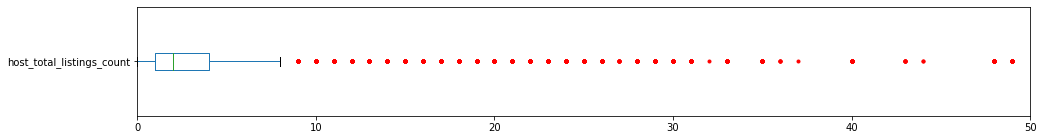

In [31]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['host_total_listings_count'].plot(kind='box', xlim=(0, 50), vert=False, flierprops=red_square, figsize=(16,2));

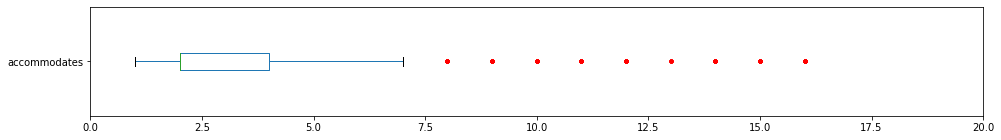

In [32]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['accommodates'].plot(kind='box', xlim=(0, 20), vert=False, flierprops=red_square, figsize=(16,2));

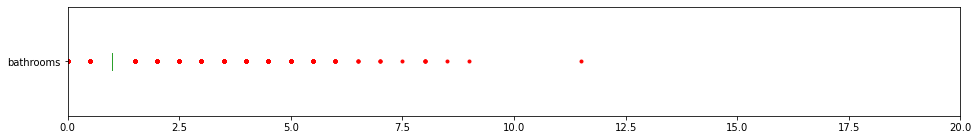

In [33]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['bathrooms'].plot(kind='box', xlim=(0, 20), vert=False, flierprops=red_square, figsize=(16,2));

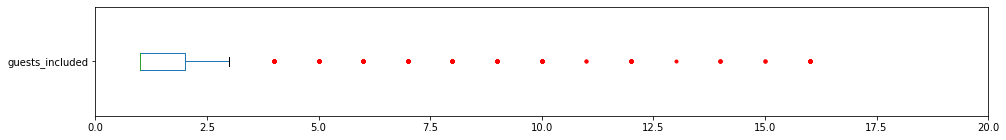

In [34]:
red_square = dict(markerfacecolor='r', markeredgecolor='r', marker='.')
data3['guests_included'].plot(kind='box', xlim=(0, 20), vert=False, flierprops=red_square, figsize=(16,2));

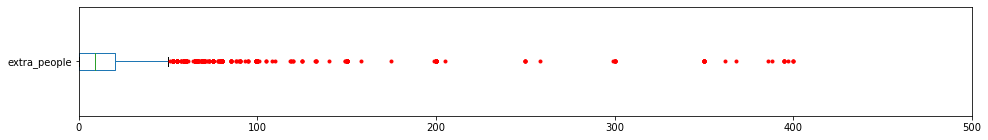

In [35]:
data3['extra_people'].plot(kind='box', xlim=(0, 500), vert=False, flierprops=red_square, figsize=(16,2));

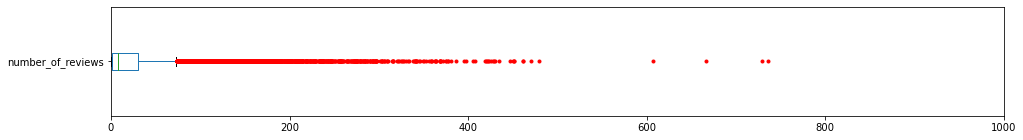

In [36]:
data3['number_of_reviews'].plot(kind='box', xlim=(0, 1000), vert=False, flierprops=red_square, figsize=(16,2));

Price frequency is depicted in the figure below. As can be seen, the majority of the values are below 2000. Consequently, I will drop the values higher than 2000

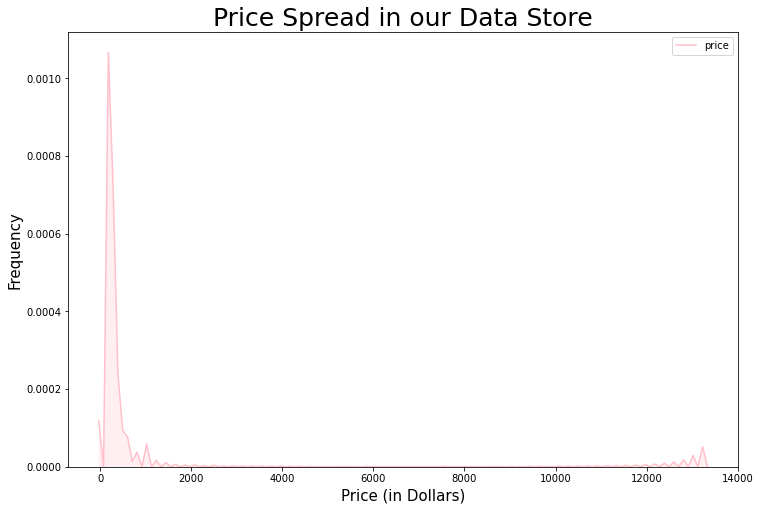

In [37]:
# Price frequency 
plt.figure(figsize=(12,8))
fig = sns.kdeplot(data3['price'], color="pink", shade = True)
fig.set_xlabel("Price (in Dollars)",size=15)
fig.set_ylabel("Frequency",size=15)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('Price Spread in our Data Store',size = 25)
plt.show()

In [24]:
data3.drop(data3[data3.price > 2000].index, axis=0, inplace=True)

data_heatmap is only defined for depicting heatmap and is not used anywhere else

In [39]:
data_heatmap=data3.drop(['id'], axis=1)

In [40]:
data_heatmap.head(1)

,host_is_superhost,host_total_listings_count,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,availability_365,number_of_reviews,review_scores_rating,instant_bookable,cancellation_policy
0,f,1.0,t,M6J,House,Entire home/apt,10,3.0,Real Bed,470.0,1000.0,150.0,1,0.0,4,0,7,95-100,f,strict_14_with_grace_period


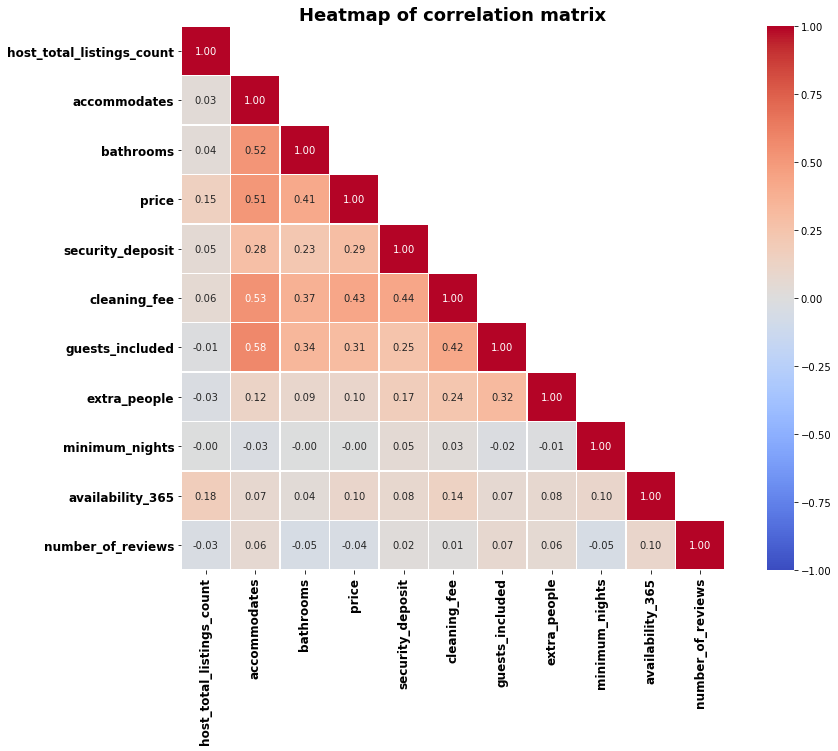

In [41]:
# correlation matrix
corr = data_heatmap.corr()

# heatmap
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot=True, fmt='.2f', square=True, cmap='coolwarm', mask=np.triu(corr, 1), vmin=-1,lw=0.5)
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.title("Heatmap of correlation matrix", fontsize=18, fontweight='bold')
plt.show()

For readability reasons, I have set the price below 1000 in the chart below. As can be seen, there is an upward trend in price as the number of the accomodates increases which is a reasonable relationship.

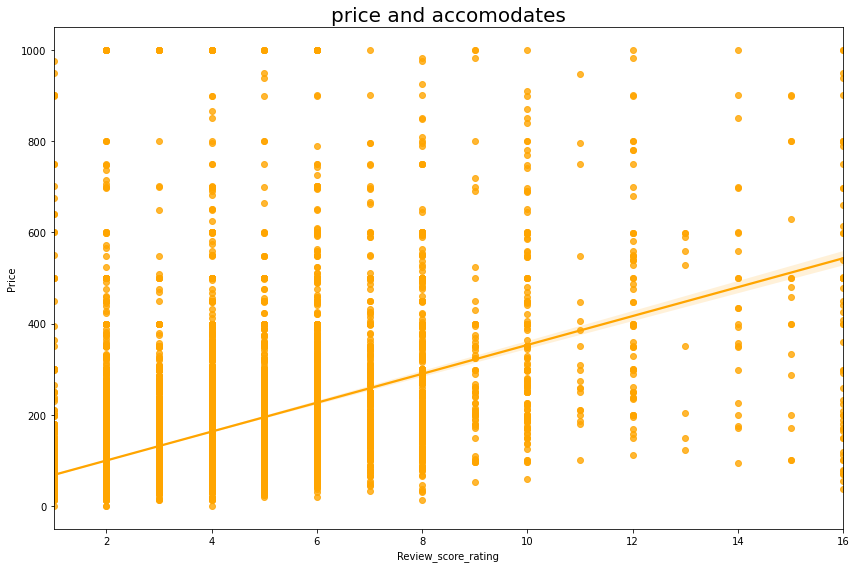

In [42]:
#Draw the scatter plot

plt.figure(figsize=(12,8))
fig=sns.regplot(x='accommodates',y='price',data=data3[data3['price']<1000],color='orange')
fig.set_xlabel("Review_score_rating",size=10)
fig.set_ylabel("Price",size=10)
plt.xticks(size=10)
plt.yticks(size=10)
plt.title('price and accomodates',size = 20)
plt.tight_layout()


Preprpcessing the "location data"

In [43]:
#coordinates of the center of downtown
#data4['lat-dt'] = 43.6548 
#data4['lon-dt'] = -79.3883

In [44]:
#r = 6371
#phi1 = np.radians(data4['lat-dt'])
#phi2 = np.radians(data4['latitude'])
#delta_phi = np.radians(data4['latitude'] - data4['lat-dt'])
#delta_lambda = np.radians(data4['longitude'] - data4['lon-dt'])
#a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
#res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
#data4['f-to-dt']= np.round(res, 2)
#data4

Location information other than distance to downtown is dropped from data set in this step.

In [45]:
#data4=data4.drop(['latitude', 'longitude', 'lon-dt','lat-dt' ], axis=1)

After doing an outlier treatment, we can even better see that the review count number is mostly below 500. Also places with 
higher prices tend to have lower reviews, the reason for which can be the fact that they are visited less often. As the prices decrease, review count increases but up to certain threshholds. The curve clearly shows that there is a relationship


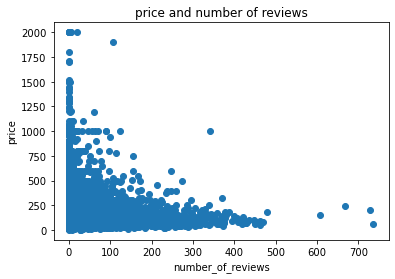

In [43]:
#Draw the scatter plot
xData =data3.number_of_reviews
yData =data3.price
plt.scatter(xData, yData)
plt.title('price and number of reviews')
plt.xlabel('number_of_reviews')
plt.ylabel('price')
plt.show()

We are going to drop variables with corrolation less than 0.05 with price

In [25]:
data3=data3.drop(['number_of_reviews','minimum_nights'], axis=1) 

# outlier treatment

In the next step, I will remove the outliers from "some of" our numeric features, as it results in an increase in our performance. I will use the  Interquartile Range(IQR) Method.In this method, Data point that falls outside of 1.5 times of an Interquartile range above the 90% quartile and below the 10% quartile are removed from the dataset. After each outlier treatment for each feature, I print data shape to show many datapoints were removed. Outlier treatment for some of the features with small interquantile range is not needed as it results in a drastic drop of the datapoints. 

In [26]:
data3.head(1)

,id,host_is_superhost,host_total_listings_count,host_identity_verified,zipcode,property_type,room_type,accommodates,bathrooms,bed_type,price,security_deposit,cleaning_fee,guests_included,extra_people,availability_365,review_scores_rating,instant_bookable,cancellation_policy
0,1419,f,1.0,t,M6J,House,Entire home/apt,10,3.0,Real Bed,470,1000.0,150.0,1,0,0,95-100,f,strict_14_with_grace_period


In [27]:
data3.shape

(20960, 19)

In [28]:
Q1=data3['host_total_listings_count'].quantile(0.1)
Q3=data3['host_total_listings_count'].quantile(0.9)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3 + 1.5 *IQR
data3=data3[data3['host_total_listings_count']<Upper_Whisker]
data3=data3[data3['host_total_listings_count']>Lower_Whisker]
data3.shape

(20262, 19)

In [29]:
Q1=data3['accommodates'].quantile(0.1)
Q3=data3['accommodates'].quantile(0.9)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3 + 1.5 *IQR
data3=data3[data3['accommodates']<Upper_Whisker]
data3=data3[data3['accommodates']>Lower_Whisker]
data3.shape

(20162, 19)

In [30]:
Q1=data3['security_deposit'].quantile(0.1)
Q3=data3['security_deposit'].quantile(0.9)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3 + 1.5 *IQR
data3=data3[data3['security_deposit']<Upper_Whisker]
data3=data3[data3['security_deposit']>Lower_Whisker]
data3.shape

(19820, 19)

In [31]:
Q1=data3['cleaning_fee'].quantile(0.1)
Q3=data3['cleaning_fee'].quantile(0.9)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3 + 1.5 *IQR
data3=data3[data3['cleaning_fee']<Upper_Whisker]
data3=data3[data3['cleaning_fee']>Lower_Whisker]
data3.shape

(19739, 19)

In [32]:
Q1=data3['availability_365'].quantile(0.1)
Q3=data3['availability_365'].quantile(0.9)
IQR=Q3-Q1
Lower_Whisker = Q1 - 1.5 *IQR
Upper_Whisker = Q3 + 1.5 *IQR
data3=data3[data3['availability_365']<Upper_Whisker]
data3=data3[data3['availability_365']>Lower_Whisker]
data3.shape

(19739, 19)

## encoding categorical values
"host_is_superhost", "instant_bookable", "host_identity_verified", "cancellation_policy", "room_type","zipcode", "property_type", "room_type", "bed_type","review_scores_rating", "cancellation_policy"

In [33]:
data4=data3.copy()

In [34]:
data4.dtypes

id                             int64
host_is_superhost             object
host_total_listings_count    float64
host_identity_verified        object
zipcode                       object
property_type                 object
room_type                     object
accommodates                   int64
bathrooms                    float64
bed_type                      object
price                          int64
security_deposit             float64
cleaning_fee                 float64
guests_included                int64
extra_people                   int64
availability_365               int64
review_scores_rating          object
instant_bookable              object
cancellation_policy           object
dtype: object

In [35]:
data4=data4.drop(['property_type'], axis=1)

In [36]:
data4=pd.get_dummies(data4,columns=['host_is_superhost'],drop_first=True)

In [37]:
data4=pd.get_dummies(data4,columns=['host_identity_verified'],drop_first=True)

In [38]:
data4=pd.get_dummies(data4,columns=['zipcode'],drop_first=True)

In [118]:
#data4=pd.get_dummies(data4,columns=['property_type'],drop_first=True)

In [39]:
data4=pd.get_dummies(data4,columns=['room_type'],drop_first=True)

In [40]:
data4=pd.get_dummies(data4,columns=['bed_type'],drop_first=True)

In [41]:
data4=pd.get_dummies(data4,columns=['review_scores_rating'],drop_first=True)

In [42]:
data4=pd.get_dummies(data4,columns=['instant_bookable'],drop_first=True)

In [43]:
data4=pd.get_dummies(data4,columns=['cancellation_policy'],drop_first=True)

In [44]:
data4.shape

(19739, 190)

In [45]:
data4.dtypes

id                                                   int64
host_total_listings_count                          float64
accommodates                                         int64
bathrooms                                          float64
price                                                int64
security_deposit                                   float64
cleaning_fee                                       float64
guests_included                                      int64
extra_people                                         int64
availability_365                                     int64
host_is_superhost_t                                  uint8
host_identity_verified_t                             uint8
zipcode_2v5                                          uint8
zipcode_G7h                                          uint8
zipcode_L3T                                          uint8
zipcode_L3t                                          uint8
zipcode_L4J                                          uin

In [182]:
data4.head(5)

,id,host_total_listings_count,accommodates,bathrooms,price,security_deposit,cleaning_fee,guests_included,extra_people,availability_365,host_is_superhost_t,host_identity_verified_t,zipcode_2v5,zipcode_G7h,zipcode_L3T,zipcode_L3t,zipcode_L4J,zipcode_L4T,zipcode_L5E,zipcode_M,zipcode_M15,zipcode_M1B,zipcode_M1C,zipcode_M1E,zipcode_M1G,zipcode_M1H,zipcode_M1J,zipcode_M1K,zipcode_M1L,zipcode_M1M,zipcode_M1N,zipcode_M1P,zipcode_M1R,zipcode_M1S,zipcode_M1T,zipcode_M1V,zipcode_M1W,zipcode_M1X,zipcode_M1h,zipcode_M1t,zipcode_M2H,zipcode_M2J,zipcode_M2K,zipcode_M2L,zipcode_M2M,zipcode_M2N,zipcode_M2P,zipcode_M2R,zipcode_M2k,zipcode_M2l,zipcode_M2m,zipcode_M2n,zipcode_M3A,zipcode_M3B,zipcode_M3C,zipcode_M3H,zipcode_M3J,zipcode_M3K,zipcode_M3L,zipcode_M3M,zipcode_M3N,zipcode_M3a,zipcode_M3j,zipcode_M3m,zipcode_M4A,zipcode_M4B,zipcode_M4C,zipcode_M4E,zipcode_M4G,zipcode_M4H,zipcode_M4J,zipcode_M4K,zipcode_M4L,zipcode_M4M,zipcode_M4N,zipcode_M4P,zipcode_M4R,zipcode_M4S,zipcode_M4T,zipcode_M4V,zipcode_M4W,zipcode_M4X,zipcode_M4Y,zipcode_M4k,zipcode_M4m,zipcode_M4p,zipcode_M4s,zipcode_M4w,zipcode_M4y,zipcode_M5A,zipcode_M5B,zipcode_M5C,zipcode_M5E,zipcode_M5G,zipcode_M5H,zipcode_M5J,zipcode_M5M,zipcode_M5N,zipcode_M5P,zipcode_M5R,zipcode_M5S,zipcode_M5T,zipcode_M5V,zipcode_M5W,zipcode_M5a,zipcode_M5b,zipcode_M5g,zipcode_M5h,zipcode_M5j,zipcode_M5s,zipcode_M5t,zipcode_M5v,zipcode_M6A,zipcode_M6B,zipcode_M6C,zipcode_M6E,zipcode_M6G,zipcode_M6H,zipcode_M6J,zipcode_M6K,zipcode_M6L,zipcode_M6M,zipcode_M6N,zipcode_M6P,zipcode_M6R,zipcode_M6S,zipcode_M6g,zipcode_M6h,zipcode_M6j,zipcode_M6k,zipcode_M6p,zipcode_M7A,zipcode_M8G,zipcode_M8V,zipcode_M8W,zipcode_M8X,zipcode_M8Y,zipcode_M8Z,zipcode_M8w,zipcode_M8z,zipcode_M9A,zipcode_M9B,zipcode_M9C,zipcode_M9L,zipcode_M9M,zipcode_M9N,zipcode_M9P,zipcode_M9R,zipcode_M9V,zipcode_M9W,zipcode_M9r,zipcode_Mp6,zipcode_N1E,zipcode_ON,zipcode_[no,zipcode_m1e,zipcode_m1k,zipcode_m1s,zipcode_m3h,zipcode_m4k,zipcode_m4m,zipcode_m4p,zipcode_m4s,zipcode_m5h,zipcode_m5s,zipcode_m5v,zipcode_m6g,zipcode_m6j,zipcode_m6k,zipcode_m9c,property_type_Apartment,property_type_Barn,property_type_Bed and breakfast,property_type_Boat,property_type_Boutique hotel,property_type_Bungalow,property_type_Cabin,property_type_Camper/RV,property_type_Casa particular (Cuba),property_type_Castle,property_type_Cave,property_type_Condominium,property_type_Cottage,property_type_Earth house,property_type_Guest suite,property_type_Guesthouse,property_type_Heritage hotel (India),property_type_Hostel,property_type_Hotel,property_type_House,property_type_In-law,property_type_Loft,property_type_Other,property_type_Serviced apartment,property_type_Tiny house,property_type_Townhouse,property_type_Train,property_type_Treehouse,property_type_Villa,room_type_Private room,room_type_Shared room,bed_type_Couch,bed_type_Futon,bed_type_Pull-out Sofa,bed_type_Real Bed,review_scores_rating_40-49,review_scores_rating_50-59,review_scores_rating_60-69,review_scores_rating_70-79,review_scores_rating_80-84,review_scores_rating_85-89,review_scores_rating_90-94,review_scores_rating_95-100,review_scores_rating_No Reviews,instant_bookable_t,cancellation_policy_moderate,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60
0,1419,1.0,10,3.0,470.0,1000.0,150.0,1,0.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,12604,1.0,1,1.5,67.0,133.0,27.0,1,20.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

# Modeling:


The price column is our dependent attribute and is put into Y data set. The rest are the independent attributes and are put into X dataset.

In [44]:
X=data4.drop(["price"], axis=1)
Y=data4["price"]

In [45]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 1)

In [ ]:
# scaling

## Amirhossein

## Random Forest

As for Random Forest, no dummies and scaling is required, I am going to split the data3 for train and test set with the same random state.

In [38]:
dataA=data3.drop(['id'], axis=1) 

In [39]:
# object to category
for col in ['host_is_superhost','host_identity_verified','zipcode','property_type', 'room_type', 'bed_type', 'instant_bookable', 
            'review_scores_rating', 'cancellation_policy']:
    dataA[col] = dataA[col].astype('category')

In [40]:
# indicating covariates and target
XA=dataA.drop(["price"], axis=1)
YA=dataA["price"]

In [41]:
# recoding categorical features

num_feats = XA.select_dtypes(include=['float64', 'int64', 'bool']).copy()

# one-hot encoding of categorical features
cat_feats = XA.select_dtypes(include=['category']).copy()
cat_feats = pd.get_dummies(cat_feats)

features_recoded = pd.concat([num_feats, cat_feats], axis=1)

In [42]:
# import train_test_split function
from sklearn.model_selection import train_test_split
# import metrics
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# split our data
xa_train, xa_test, ya_train, ya_test = train_test_split(features_recoded, YA, test_size=0.2, random_state=1)

Some of the important hyperparameters to tune in Random Forest are:

- n_estimators = number of trees in the foreset
- max_features = max number of features considered for splitting a node
- max_depth = max number of levels in each decision tree
- min_samples_split = min number of data points placed in a node before the node is split
- min_samples_leaf = min number of data points allowed in a leaf node
- bootstrap = method for sampling data points (with or without replacement)

In [43]:
# RF
from sklearn.ensemble import RandomForestRegressor

randf = RandomForestRegressor()

### Hyperparameter tuning

We are going to apply Cross-validation to tune random forest hyperperparameters. Because of the long running time for grid search, we have no options but doing the job steb-by-step.

In [54]:
# hyperparameter grid search for RF

from sklearn.model_selection import GridSearchCV

param_grid = { 
            "n_estimators"      : [100,200],
            #"max_features"      : ["auto", "sqrt"],
            #"min_samples_split" : [2,4,6],
           # "max_depth"         : [60,70,80,None],
           # "min_samples_leaf"  : [1,3,5]

            }

grid = GridSearchCV(randf, param_grid, n_jobs=-1, cv=5)
grid.fit(xa_train, ya_train)


print(grid.best_params_)

{'n_estimators': 200}


In [56]:
# repeating_hyperparameter grid search for RF based on the result from the previous step


param_grid = { 
            "n_estimators"      : [200,300],
            #"max_features"      : ["auto", "sqrt"],
            #"min_samples_split" : [2,4,6],
           # "max_depth"         : [60,70,80,None],
           # "min_samples_leaf"  : [1,3,5]

            }

grid = GridSearchCV(randf, param_grid, n_jobs=-1, cv=5)
grid.fit(xa_train, ya_train)


print(grid.best_params_)

{'n_estimators': 200}


In [82]:
# repeating_hyperparameter grid search for RF based on the result from the previous step


param_grid = { 
            "n_estimators"      : [200],
            "max_features"      : ["sqrt"],
            "min_samples_split" : [2,4,6],
            "max_depth"         : [60,70,None],
            "min_samples_leaf"  : [1,3,5]

            }

grid = GridSearchCV(randf, param_grid, n_jobs=-1, cv=5)
grid.fit(xa_train, ya_train)


print(grid.best_params_)

{'max_depth': 60, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 200}


We uses the results from hypeerparameter grid search in the model.

In [69]:
# Without tuning
#randf = RandomForestRegressor(random_state=1)

#randf.fit(xa_train, ya_train)

#randf_pred=randf.predict(xa_test)

In [44]:
# With tuning

randf = RandomForestRegressor(n_estimators=200, max_depth= 60, min_samples_split= 4, min_samples_leaf= 1, max_features= 'sqrt', random_state=1)

randf.fit(xa_train, ya_train)

randf_pred=randf.predict(xa_test)

In [45]:
print('-------------Random Forest_Tuned-------------')


print('RMSE: %f'% round(np.sqrt(mean_squared_error(ya_test,randf_pred)),2))   

print('MAE: %f'% round(np.sqrt(mean_absolute_error(ya_test,randf_pred)),2))   

print('R2 %f' % round(r2_score(ya_test,randf_pred),2))

-------------Random Forest_Tuned-------------
RMSE: 83.870000
MAE: 6.500000
R2 0.490000


3 metrics will be calculated for evaluating predictions.

Mean Absolute Error (MAE) shows the difference between predictions and actual values.

Root Mean Square Error (RMSE) shows how accurately the model predicts the response.

R^2 will be calculated to find the goodness of fit measure.

---

### XGBoost

In [49]:
import xgboost as xgb

# create a baseline
booster = xgb.XGBRegressor()

Some of the important hyperparameters to tune an XGBoost are:

- n_estimators  = Number of trees one wants to build.
- learning_rate  = Rate at which our model learns patterns in data. After every round, it shrinks the feature weights to reach the best optimum.
- max_depth  = Determines how deeply each tree is allowed to grow during any boosting round.
- colsample_bytree = Percentage of features used per tree.
- gamma  = Specifies the minimum loss reduction required to make a split.

In [46]:
import re
regex = re.compile(r"\[|\]|<", re.IGNORECASE)


features_recoded.columns = [regex.sub("_", col) if any(x in str(col) for x in set(('[', ']', '<'))) else col for col in features_recoded.columns.values]

In [47]:
xa_train, xa_test, ya_train, ya_test = train_test_split(features_recoded, YA, test_size=0.2, random_state=1)

In [100]:
# hyperparameter grid search for xgboost

param_grid = {'n_estimators': [100, 200],
              #'learning_rate': [0.01, 0.05, 0.1], 
              #'max_depth': [3, 4, 5, 6, 7],
              #'colsample_bytree': [0.6, 0.7, 1],
              #'gamma': [0.0, 0.1, 0.2]
             }



In [101]:
grid = GridSearchCV(booster, param_grid, n_jobs=-1, cv=5)
grid.fit(xa_train, ya_train)


print(grid.best_params_)

{'n_estimators': 100}


In [58]:
# instantiate xgboost with best parameters
booster = xgb.XGBRegressor(random_state=1)

# train
booster.fit(xa_train, ya_train)

# predict
booster_pred = booster.predict(xa_test)

In [59]:
print('-------------XGBoost-----------')


print('RMSE: %f'% round(np.sqrt(mean_squared_error(ya_test,booster_pred)),2))   

print('MAE: %f'% round(np.sqrt(mean_absolute_error(ya_test,booster_pred)),2))   

print('R2 %f' % round(r2_score(ya_test,booster_pred),2))

-------------XGBoost-----------
RMSE: 83.850000
MAE: 6.620000
R2 0.490000


### Gradient Boosting Regression


In [56]:
from sklearn.ensemble import GradientBoostingRegressor

gbr = GradientBoostingRegressor(n_estimators = 100, max_depth = 3, min_samples_split = 2, learning_rate = 0.1, random_state=1)

gbr.fit(xa_train, ya_train)

# Predicting the Test set results
gbr_pred = gbr.predict(xa_test)

In [57]:
print('-------------gbr-----------')


print('RMSE: %f'% round(np.sqrt(mean_squared_error(ya_test,gbr_pred)),2))   

print('MAE: %f'% round(np.sqrt(mean_absolute_error(ya_test,gbr_pred)),2))   

print('R2 %f' % round(r2_score(ya_test,gbr_pred),2))

-------------gbr-----------
RMSE: 82.860000
MAE: 6.680000
R2 0.510000


### Neural Networks

We first importing the dataset, and then define a standardized version of it for comparing the result. While keras and sklearn do the same job in this case, we used both to develop a NN.

In [242]:
#from sklearn.model_selection import train_test_split

dataN=data3.drop(['id'], axis=1) 

XN=dataN.drop(["price"], axis=1)
YN=dataN["price"]

cat_cols = ['host_is_superhost','host_identity_verified','zipcode','property_type', 'room_type', 'bed_type',
                    'instant_bookable', 'review_scores_rating', 'cancellation_policy']

XN_dum = pd.get_dummies(XN, columns=cat_cols)

In [243]:
from sklearn.model_selection import train_test_split

xn_train, xn_test, yn_train, yn_test = train_test_split(XN_dum, YN, test_size = 0.2, random_state=1)

In [244]:
xn_train_drop = xn_train0.select_dtypes(exclude=['int64','float64']).copy()

xn_test_drop = xn_test0.select_dtypes(exclude=['int64','float64']).copy()

xn_train_num = xn_train.select_dtypes(include=['int64','float64']).copy()
    
xn_test_num = xn_test.select_dtypes(include=['int64','float64']).copy()  


In [245]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xn_train_std = sc.fit_transform(xn_train_num)
xn_test_std = sc.transform(xn_test_num)

In [246]:
xn_train_std=pd.DataFrame(xn_train_std, index=xn_train_num.index, columns=xn_train_num.columns)
xn_test_std=pd.DataFrame(xn_test_std, index=xn_test_num.index, columns=xn_test_num.columns)

In [247]:
xn_train_s = pd.concat([xn_train_std, xn_train_drop], axis=1)
xn_test_s = pd.concat([xn_test_std, xn_test_drop], axis=1)

### NN_keras (Standardization deteriorate performances a bit)

In [248]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Dense, Dropout, DenseFeatures
from tensorflow.keras.metrics import mean_squared_error
from tensorflow.keras.optimizers import Adam, SGD, RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

# REZAEI github
LEARNING_RATE = 0.001
EPOCHS = 300
BATCH_SIZE = 256
DECAY_RATE = 0.0001


In [249]:
# REZAEI github

model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=len(xn_train.values[0])))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='linear'))
adam = optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=DECAY_RATE, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(xn_train, yn_train, epochs=EPOCHS, batch_size=BATCH_SIZE)
print("finished fitting")

Train on 15791 samples
Epoch 1/300
15791/15791 [==============================] - 0s 11us/sample - loss: 22302.4728
Epoch 2/300
15791/15791 [==============================] - 0s 10us/sample - loss: 15206.0793
Epoch 3/300
15791/15791 [==============================] - 0s 10us/sample - loss: 13540.3907
Epoch 4/300
15791/15791 [==============================] - 0s 10us/sample - loss: 12843.6487
Epoch 5/300
15791/15791 [==============================] - 0s 10us/sample - loss: 12376.9036
Epoch 6/300
15791/15791 [==============================] - 0s 10us/sample - loss: 11910.7153
Epoch 7/300
15791/15791 [==============================] - 0s 10us/sample - loss: 11516.9772
Epoch 8/300
15791/15791 [==============================] - 0s 10us/sample - loss: 11102.1416
Epoch 9/300
15791/15791 [==============================] - 0s 10us/sample - loss: 10812.0184
Epoch 10/300
15791/15791 [==============================] - 0s 11us/sample - loss: 10575.2772
Epoch 11/300
15791/15791 [====================

In [250]:
# REZAEI my continue

y_pred = model.predict(xn_test)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regnn_mse = mean_squared_error(yn_test, y_pred)
regnn_mae = mean_absolute_error(yn_test, y_pred)
regnn_r2 = r2_score(yn_test, y_pred)

print('-------------NN-keras WO standardization-----------')

print("MSE Error:", round(regnn_mse, 2))
print("RMSE Error", round(np.sqrt(regnn_mse)))
print("MAE Error:", round(regnn_mae, 2))
print("r2_score:", round(regnn_r2, 2))

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
-------------NN-keras WO standardization-----------
MSE Error: 7606.17
RMSE Error 87.0
MAE Error: 44.61
r2_score: 0.45


In [251]:
# REZAEI github standardaized data

model = Sequential()
model.add(Dense(units=20, activation='relu', input_dim=len(xn_train.values[0])))
model.add(Dense(units=5, activation='relu'))
model.add(Dense(units=1, activation='linear'))
adam = optimizers.Adam(lr=LEARNING_RATE, beta_1=0.9, beta_2=0.999, epsilon=None, decay=DECAY_RATE, amsgrad=False)
model.compile(loss='mean_squared_error', optimizer=adam)
model.fit(xn_train_s, yn_train, epochs=NUM_ITERATIONS, batch_size=BATCH_SIZE)
print("finished fitting")

Train on 15791 samples
Epoch 1/300
15791/15791 [==============================] - 0s 10us/sample - loss: 32513.1786
Epoch 2/300
15791/15791 [==============================] - 0s 11us/sample - loss: 32151.1586
Epoch 3/300
15791/15791 [==============================] - 0s 11us/sample - loss: 30607.4134
Epoch 4/300
15791/15791 [==============================] - 0s 10us/sample - loss: 26868.7327
Epoch 5/300
15791/15791 [==============================] - 0s 10us/sample - loss: 21051.4639
Epoch 6/300
15791/15791 [==============================] - 0s 10us/sample - loss: 15263.3194
Epoch 7/300
15791/15791 [==============================] - 0s 10us/sample - loss: 12055.5808
Epoch 8/300
15791/15791 [==============================] - 0s 10us/sample - loss: 11016.6601
Epoch 9/300
15791/15791 [==============================] - 0s 10us/sample - loss: 10653.4109
Epoch 10/300
15791/15791 [==============================] - 0s 12us/sample - loss: 10401.1545
Epoch 11/300
15791/15791 [====================

In [252]:
# REZAEI my continue standardized data

y_pred = model.predict(xn_test_s)

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regnn_mse = mean_squared_error(yn_test, y_pred)
regnn_mae = mean_absolute_error(yn_test, y_pred)
regnn_r2 = r2_score(yn_test, y_pred)

print('-------------NN-keras standardization-----------')

print("MSE Error:", round(regnn_mse, 2))
print("RMSE Error", round(np.sqrt(regnn_mse)))
print("MAE Error:", round(regnn_mae, 2))
print("r2_score:", round(regnn_r2, 2))

-------------NN-keras standardization-----------
MSE Error: 7785.23
RMSE Error 88.0
MAE Error: 45.68
r2_score: 0.44


### NN_ MLP (Standardization deteriorate performances)

In [233]:
from sklearn import neural_network
from sklearn.model_selection import train_test_split

In [234]:
dataN=data3.drop(['id'], axis=1) 
dataN = pd.get_dummies(dataN, columns=categorical_cols)

XN=dataN.drop(["price"], axis=1)
YN=dataN["price"]

# Splitting the dataset into the Training set and Test set
xn_train, xn_test, yn_train, yn_test = train_test_split(XN, YN, test_size = 0.2, random_state=1)

In [275]:
dense_1_size = 20
dense_2_size = 5
learning_rate = 0.001
epochs = 300 

hidden_layers_size = [5] # number of hidden neurons for each hidden layer (adding a dimension adds a layer)

regr_nn = neural_network.MLPRegressor(alpha=0.001, # l2-regularization (weight decay)
                                      hidden_layer_sizes=(dense_1_size,dense_2_size),
                                      early_stopping=True, # stop if validation performance decreases
                                      verbose=True,
                                      activation="relu",
                                      solver="adam",
                                      learning_rate="constant",
                                      learning_rate_init=learning_rate, 
                                      max_iter=epochs,
                                      random_state=1)

In [276]:
regr_nn.fit(xn_train, yn_train)


Iteration 1, loss = 13972.06668951
Validation score: -0.357634
Iteration 2, loss = 8754.32842806
Validation score: -0.078871
Iteration 3, loss = 7898.96519798
Validation score: -0.021870
Iteration 4, loss = 7410.61556105
Validation score: 0.039737
Iteration 5, loss = 6954.30083767
Validation score: 0.090060
Iteration 6, loss = 6673.51585606
Validation score: 0.112295
Iteration 7, loss = 6532.28881033
Validation score: 0.127162
Iteration 8, loss = 6434.07415029
Validation score: 0.134845
Iteration 9, loss = 6334.08300255
Validation score: 0.152037
Iteration 10, loss = 6210.02395913
Validation score: 0.172454
Iteration 11, loss = 6078.36324906
Validation score: 0.192176
Iteration 12, loss = 5917.99486965
Validation score: 0.214088
Iteration 13, loss = 5776.36806215
Validation score: 0.228937
Iteration 14, loss = 5622.18757724
Validation score: 0.248610
Iteration 15, loss = 5475.98886620
Validation score: 0.258874
Iteration 16, loss = 5368.89536119
Validation score: 0.275070
Iteration 17,

MLPRegressor(alpha=0.001, early_stopping=True, hidden_layer_sizes=(20, 5),
             max_iter=300, random_state=1, verbose=True)

In [279]:
from functools import reduce

print("number of parameters:", reduce(lambda x,y: x+y, 
                                       list(map(lambda x: x.size, regr_nn.coefs_+regr_nn.intercepts_)) ))

number of parameters: 4651


In [277]:
# Make test predictions
yn_pred = regr_nn.predict(xn_test)

In [265]:
import pandas as pd 
yn_pred=pd.Series(yn_pred)

<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>


In [278]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

regnn_mse = mean_squared_error(yn_test, yn_pred)
regnn_mae = mean_absolute_error(yn_test, yn_pred)
regnn_r2 = r2_score(yn_test, yn_pred)

print('-------------NN-MLP WO standardization-----------')

print("MSE Error:", round(regnn_mse, 2))
print("RMSE Error", round(np.sqrt(regnn_mse)))
print("MSE Error:", round(regnn_mae, 2))
print("r2_score:", round(regnn_r2, 2))

-------------NN-MLP WO standardization-----------
MSE Error: 7615.82
RMSE Error 87.0
MSE Error: 45.15
r2_score: 0.45


In [258]:
# standardized data

regr_nn.fit(xn_train_s, yn_train)

y_pred_s = regr_nn.predict(xn_test_s)

Iteration 1, loss = 16382.05712594
Validation score: -1.387528
Iteration 2, loss = 16296.68890396
Validation score: -1.367484
Iteration 3, loss = 16130.97039574
Validation score: -1.333697
Iteration 4, loss = 15886.02021566
Validation score: -1.287872
Iteration 5, loss = 15572.40321991
Validation score: -1.231467
Iteration 6, loss = 15192.55390463
Validation score: -1.165123
Iteration 7, loss = 14752.68956734
Validation score: -1.089412
Iteration 8, loss = 14267.55024438
Validation score: -1.007805
Iteration 9, loss = 13745.54211404
Validation score: -0.920624
Iteration 10, loss = 13192.65768425
Validation score: -0.829071
Iteration 11, loss = 12616.29188479
Validation score: -0.735696
Iteration 12, loss = 12041.09854411
Validation score: -0.642793
Iteration 13, loss = 11465.96512959
Validation score: -0.550978
Iteration 14, loss = 10899.89863543
Validation score: -0.460934
Iteration 15, loss = 10332.05537992
Validation score: -0.372645
Iteration 16, loss = 9801.60845372
Validation sco

In [259]:
regnn_mse = mean_squared_error(yn_test, y_pred_s)
regnn_mae = mean_absolute_error(yn_test, y_pred_s)
regnn_r2 = r2_score(yn_test, y_pred_s)

print('-------------NN-MLP With standardization-----------')

print("MSE Error:", round(regnn_mse, 2))
print("RMSE Error", round(np.sqrt(regnn_mse)))
print("MSE Error:", round(regnn_mae, 2))
print("r2_score:", round(regnn_r2, 2))

-------------NN-MLP With standardization-----------
MSE Error: 8356.63
RMSE Error 91.0
MSE Error: 49.11
r2_score: 0.4


# Fatemeh - Linear regression

In [47]:
X=data4.drop(["price"], axis=1)
Y=data4["price"]

In [48]:
target= Y
features_recoded=X
New_X = X.copy()

In [49]:
data4.dtypes

id                                                   int64
host_total_listings_count                          float64
accommodates                                         int64
bathrooms                                          float64
price                                                int64
security_deposit                                   float64
cleaning_fee                                       float64
guests_included                                      int64
extra_people                                         int64
availability_365                                     int64
host_is_superhost_t                                  uint8
host_identity_verified_t                             uint8
zipcode_2v5                                          uint8
zipcode_G7h                                          uint8
zipcode_L3T                                          uint8
zipcode_L3t                                          uint8
zipcode_L4J                                          uin

In [50]:
from sklearn.model_selection import train_test_split

xn_train, xn_test, yn_train, yn_test = train_test_split(New_X, Y, test_size=0.2 , random_state = 1)

In [52]:
xn_train_drop = xn_train.select_dtypes(exclude=['int64','float64']).copy()

xn_test_drop = xn_test.select_dtypes(exclude=['int64','float64']).copy()

xn_train_num = xn_train.select_dtypes(include=['int64','float64']).copy()
    
xn_test_num = xn_test.select_dtypes(include=['int64','float64']).copy()

In [53]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xn_train_std = sc.fit_transform(xn_train_num)
xn_test_std = sc.transform(xn_test_num)

In [54]:
xn_train_std=pd.DataFrame(xn_train_std, index=xn_train_num.index, columns=xn_train_num.columns)
xn_test_std=pd.DataFrame(xn_test_std, index=xn_test_num.index, columns=xn_test_num.columns)

In [55]:
xn_train_s = pd.concat([xn_train_std, xn_train_drop], axis=1)
xn_test_s = pd.concat([xn_test_std, xn_test_drop], axis=1)

# Linear regression model¶

In [56]:
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [57]:
def eval_metrics(y_test, y_pred):
    """
    This function seeks to evaluate the performance metrics of a model. It takes in two variables:
    y_test the set of outcomes for the test data set.
    y_pred is the set of outcomes predicted by our model.
    """
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    
    metrics_dict = {'R2': r2*100,
                    'MAE': mae,
                    'RMSE': rmse}
    
    print(f'The r2 score is given as: {(r2*100):.2f}%')
    print(f'The mean absolute error is: {mae:.4f}')
    print(f'The mean squared error is: {mse:.4f}')
    print(f'The root mean squared error is: {rmse:.4f}')
    
    return metrics_dict

# 3.4a * Training a Linear Regression with standardized data

In [58]:
# Create linear regression object
regr_std = LinearRegression()

# Train the model using the training sets
regr_std.fit(xn_train_s, yn_train)

LinearRegression()

In [59]:
# Make predictions using the testing set
pred_regr_std = regr_std.predict(xn_test_s)
LR_std = eval_metrics(yn_test, pred_regr_std)

The r2 score is given as: 40.57%
The mean absolute error is: 49.4948
The mean squared error is: 8271.2835
The root mean squared error is: 90.9466


<AxesSubplot:>

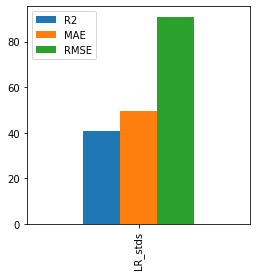

In [60]:
Mod_Eval = pd.DataFrame(LR_std.values(), index = LR_std.keys(), columns=['LR_stds'])
Mod_Eval.T.plot(kind='bar', figsize=(4,4))

# 3.4b Training a Linear Regression with non-standardized data

In [62]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(xn_train, yn_train)

LinearRegression()

In [63]:
# Make predictions using the testing set
pred_regr = regr.predict(xn_test)
LR_nonstd = eval_metrics(yn_test, pred_regr)

The r2 score is given as: 40.57%
The mean absolute error is: 49.4948
The mean squared error is: 8271.2835
The root mean squared error is: 90.9466


<AxesSubplot:>

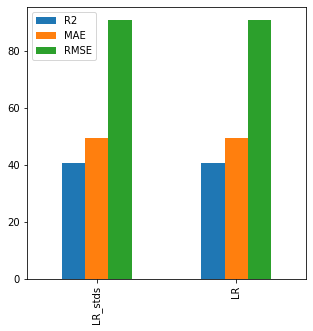

In [64]:
Mod_Eval['LR'] = LR_nonstd.values()
Mod_Eval.T.plot(kind='bar', figsize=(5,5))

# 3.4c * Training a RidgeCV with standardized data

In [66]:
ridge_std = RidgeCV(alphas=[0.001, 0.01, 0.1, 0.25, 1], cv=5)
ridge_std.fit(xn_train_s, yn_train)

RidgeCV(alphas=array([0.001, 0.01 , 0.1  , 0.25 , 1.   ]), cv=5)

In [69]:
# Make predictions using the testing set
pred_ridge_std = ridge_std.predict(xn_test_s)
ridge_std_eval = eval_metrics(yn_test, pred_ridge_std)

The r2 score is given as: 40.47%
The mean absolute error is: 49.5267
The mean squared error is: 8284.7113
The root mean squared error is: 91.0204


<AxesSubplot:>

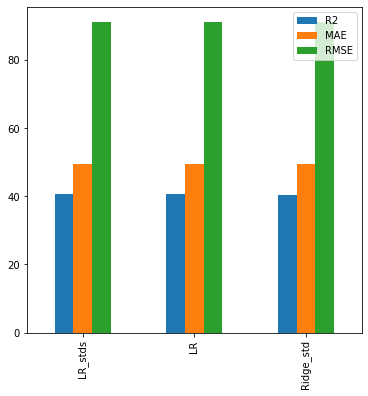

In [70]:
Mod_Eval['Ridge_std'] = ridge_std_eval.values()
Mod_Eval.T.plot(kind='bar', figsize=(6,6))

# 3.4d * Training a RidgeCV with non-standardized data

In [73]:
ridge = RidgeCV(alphas=[0.001, 0.01, 0.1, 0.25, 1], cv=5)
ridge.fit(xn_train, yn_train)

In [75]:
pred_ridge = ridge.predict(xn_test)
ridge_eval = eval_metrics(yn_test, pred_ridge)

The r2 score is given as: 40.47%
The mean absolute error is: 49.5267
The mean squared error is: 8284.7157
The root mean squared error is: 91.0204


<AxesSubplot:>

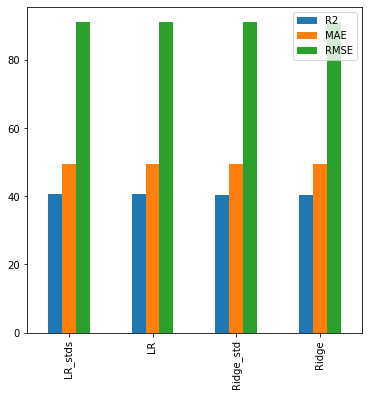

In [76]:
Mod_Eval['Ridge'] = ridge_eval.values()
Mod_Eval.T.plot(kind='bar', figsize=(6,6))

# 3.4e * Training a LassoCV with standardized data

In [77]:
lasso_std = LassoCV(alphas=[0.001, 0.01, 0.1, 0.25, 1], cv=5)
lasso_std.fit(xn_train_s, yn_train)

LassoCV(alphas=[0.001, 0.01, 0.1, 0.25, 1], cv=5)

In [78]:
pred_lasso_std = lasso_std.predict(xn_test_s)
lasso_std_eval = eval_metrics(yn_test, pred_lasso_std)

The r2 score is given as: 40.55%
The mean absolute error is: 49.4479
The mean squared error is: 8273.9068
The root mean squared error is: 90.9610


<AxesSubplot:>

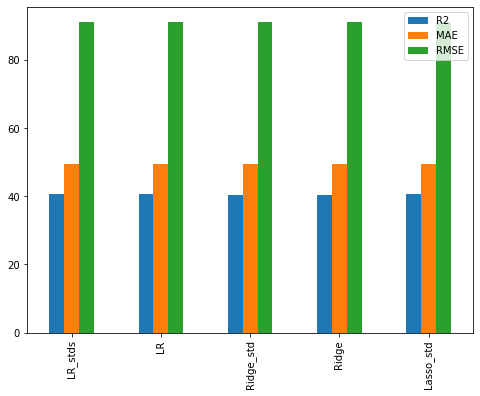

In [79]:
Mod_Eval['Lasso_std'] = lasso_std_eval.values()
Mod_Eval.T.plot(kind='bar', figsize=(8,6))

# 3.4f * Training a LassoCV with non standard data

In [81]:
lasso = LassoCV(alphas=[0.001, 0.01, 0.1, 0.25, 1], cv=5)
lasso.fit(xn_train, yn_train)

In [82]:
pred_lasso = lasso.predict(xn_test)
lasso_eval = eval_metrics(yn_test, pred_lasso)

The r2 score is given as: 40.55%
The mean absolute error is: 49.4486
The mean squared error is: 8273.9156
The root mean squared error is: 90.9611


<AxesSubplot:>

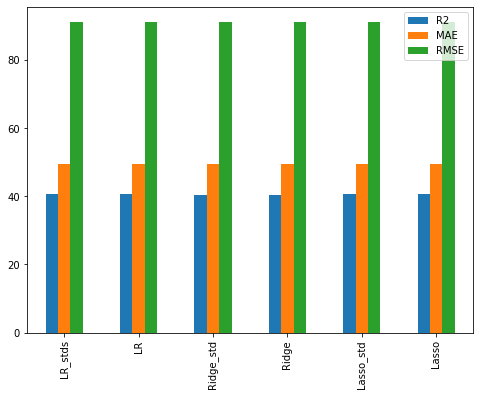

In [83]:
Mod_Eval['Lasso'] = lasso_eval.values()
Mod_Eval.T.plot(kind='bar', figsize=(8,6))